PREDICCIÓN ESTADIO MELANOMA: GENES

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pycaret.classification import *
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score

CARGAR LOS DATOS

In [2]:
df = pd.read_csv('df_truetarget.csv')
df.head()

,Subtype,TCGA PanCanAtlas Cancer Type Acronym,Other Patient ID,Diagnosis Age,Sex,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,trueTarget
0,SKCM,SKCM,5564E6A7-2195-4B0D-994E-B0617B58E889,71.0,Male,STAGE IA,7TH,NaN,-26176,0.0,...,1.5289,-1.4791,-1.0775,-0.5874,0.7428,-0.2728,-2.0876,-2.2139,-0.1152,False
1,SKCM,SKCM,551E071A-C290-4B48-9000-F64C2A44DFB7,82.0,Male,STAGE IIA,6TH,2022.0,-30286,0.0,...,-0.5350,0.5245,0.2616,0.3533,-0.7334,-0.1408,-0.3072,-1.2198,0.6850,False
2,SKCM,SKCM,A29A20E3-5C2C-4F37-B93E-AE9EBC46EC53,82.0,Male,STAGE IIIA,7TH,NaN,-30163,0.0,...,-0.5780,-0.6422,-0.2198,0.6876,1.4183,0.2610,-0.4649,-0.5828,-0.0017,False
3,NaN,SKCM,3DD5A206-D7F3-42F1-B9CC-4B31C76D495D,46.0,Female,STAGE IIC,7TH,387.0,-17025,0.0,...,-0.0718,-0.1132,-0.1148,0.3637,-1.3046,-1.0278,0.2870,0.7965,-1.7373,True
4,NaN,SKCM,EFF78AF6-0F68-49B9-866B-0D511606F2B1,74.0,Female,STAGE IIC,7TH,14.0,-27124,0.0,...,0.4944,0.6672,0.3759,-0.7236,-1.3046,0.5597,0.2858,-0.6041,1.3473,True


EXPLORACIÓN DE LOS DATOS

In [3]:
print(df.shape)
df.info()

(436, 20549)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Columns: 20549 entries, Subtype to trueTarget
dtypes: bool(1), float64(20520), object(28)
memory usage: 68.4+ MB


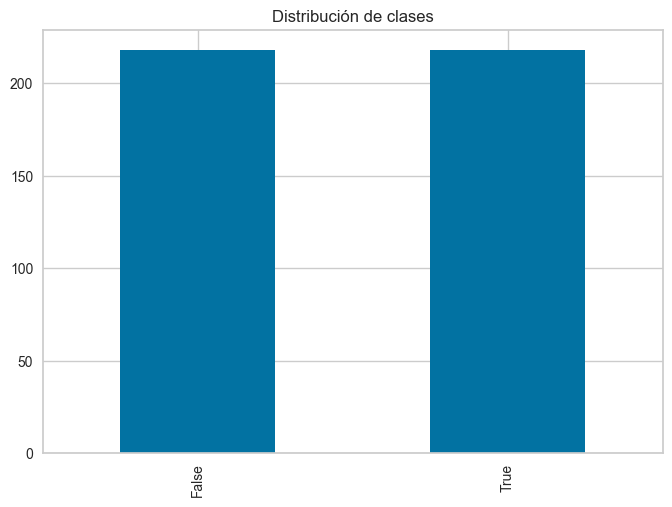

In [4]:
df['trueTarget'].value_counts().plot(kind='bar')
plt.title('Distribución de clases')
plt.show()

PREPROCESAMIENTO DE LOS DATOS

In [ ]:
#porcentaje valores nulos
datos_faltantes = df.isna().sum()
porcentaje_na = (datos_faltantes / len(df)) * 100
print(porcentaje_na)

Subtype                                 17.889908
TCGA PanCanAtlas Cancer Type Acronym     0.000000
Other Patient ID                         0.000000
Diagnosis Age                            1.605505
Sex                                      0.000000
                                          ...    
ZYG11B                                   0.000000
ZYX                                      0.000000
ZZEF1                                    0.000000
ZZZ3                                     0.000000
trueTarget                               0.000000
Length: 20195, dtype: float64


In [15]:
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')

In [ ]:
#selección columnas de genes
gene_cols = df.columns[df.columns.get_loc('SSX9P'):]
df_genes = df[gene_cols]
df_genes

,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,HSPB1P1,ANKRD20A20P,GTPBP6,EFCAB12,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,trueTarget
0,-1.1674,-0.7776,-1.3053,-0.6906,-1.4953,-2.8793,-0.7259,-1.5391,-0.1517,-0.3715,...,1.5289,-1.4791,-1.0775,-0.5874,0.7428,-0.2728,-2.0876,-2.2139,-0.1152,False
1,-1.1674,-0.5525,0.2834,-0.2565,-1.4953,-2.8793,-0.3385,1.3110,0.5436,-0.0809,...,-0.5350,0.5245,0.2616,0.3533,-0.7334,-0.1408,-0.3072,-1.2198,0.6850,False
2,-1.1674,-0.6006,0.1596,-0.9029,-1.4953,-2.8793,0.0433,-1.5391,0.4422,0.4069,...,-0.5780,-0.6422,-0.2198,0.6876,1.4183,0.2610,-0.4649,-0.5828,-0.0017,False
3,-0.6248,-1.0828,0.4881,1.2143,-1.4953,-2.8793,0.6230,-1.5391,0.3770,1.2733,...,-0.0718,-0.1132,-0.1148,0.3637,-1.3046,-1.0278,0.2870,0.7965,-1.7373,True
4,-1.1674,-1.0828,-1.3053,0.3070,-1.4953,-2.8793,0.3525,-1.5391,0.5577,-1.4399,...,0.4944,0.6672,0.3759,-0.7236,-1.3046,0.5597,0.2858,-0.6041,1.3473,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,-1.1674,-1.0828,-1.3053,-1.3256,-1.4953,-2.8793,-0.0904,-1.5391,0.0656,-0.5436,...,0.7134,1.0511,0.6257,0.0850,-0.6262,0.5643,-0.5405,1.9254,0.3507,False
432,-1.1674,-1.0828,0.5880,-1.0679,-1.4953,-2.8793,1.1080,2.1410,0.4084,-0.4966,...,-0.7866,-0.0144,0.1821,-1.6252,-1.3046,0.4194,-1.3487,0.2471,0.4648,True
433,-1.1674,0.9449,-0.3533,0.0460,-1.4953,-2.8793,-0.7338,-1.5391,1.3516,2.0752,...,0.9792,0.8877,1.1734,1.3201,-0.2602,-0.8492,-0.6856,0.8800,-0.9265,True
434,-1.1674,-0.6736,-0.5507,-0.9442,-0.7698,-2.8793,-0.3339,-1.5391,0.3484,1.2003,...,-0.1656,0.9342,1.1056,-1.9422,-1.3046,1.5201,-1.1748,0.5387,1.1137,False


In [17]:
y = df['trueTarget']
X = df_genes.drop(columns='trueTarget')
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  
    random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,
    stratify=y_temp,
    random_state=42
)

TRANSFORMAR DATOS Y APLICAR PCA (reducir dimensionalidad)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [19]:
componentes = 200
pca_final = PCA(n_components=componentes)
X_train_pca_comp = pca_final.fit_transform(X_train_scaled)
X_test_pca_comp = pca_final.transform(X_test_scaled)
X_val_pca_comp = pca_final.transform(X_val_scaled)

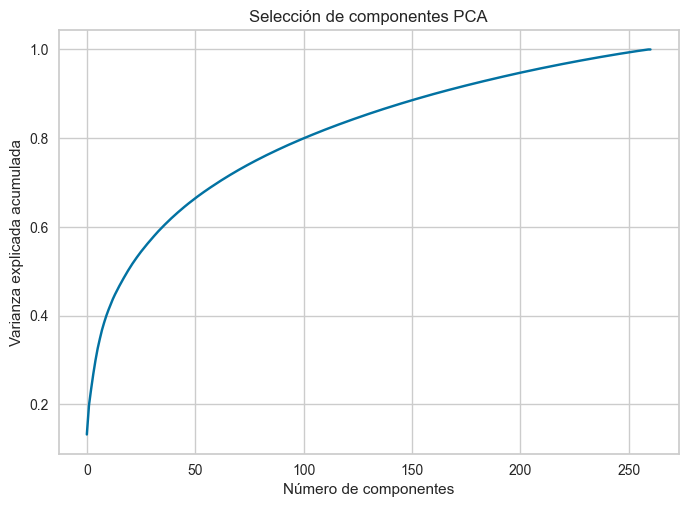

In [20]:
pca_temp = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca_temp.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Selección de componentes PCA')
plt.show()

In [105]:
var_explicada = np.sum(pca_temp.explained_variance_ratio_[:200])
print(f"Varianza acumulada con 200 componentes: {var_explicada:.2%}")

Varianza acumulada con 200 componentes: 94.65%


In [21]:
df_train_pca_final = pd.DataFrame(X_train_pca_comp, columns=[f'PC{i+1}' for i in range(componentes)]).reset_index(drop=True)
df_train_pca_final['True Target'] = y_train.reset_index(drop=True)
df_train_pca_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,True Target
0,-36.665698,50.662120,-8.560345,-8.849043,-46.948377,-16.104944,4.839868,0.542843,12.156072,-12.010556,...,1.692489,-1.353851,-1.438663,-3.138296,0.380198,1.599519,-1.563744,0.240999,-2.620392,True
1,-13.699688,-7.709218,-12.993469,11.980363,-4.954112,16.862988,-12.127717,-2.095647,1.347087,7.647968,...,8.424584,-1.444440,-12.817243,0.133078,8.003581,1.442512,-2.066534,-3.604792,3.150793,True
2,-56.572316,77.551377,25.431968,8.810475,-20.578559,6.096110,8.042330,-9.608865,-32.534866,6.543965,...,-2.975816,0.756684,-1.664701,-1.812597,-3.951369,1.200671,-2.928772,-2.039023,-4.016459,False
3,-62.419000,-26.666794,-43.018716,-76.658047,27.526289,49.118844,-23.508192,27.723566,74.794779,54.469647,...,4.317274,-0.655136,-3.015097,-2.799840,3.997040,-1.204609,-3.968110,-0.405674,4.655285,True
4,-8.052600,-32.068277,35.757242,-17.133040,-3.602539,42.489018,5.616002,29.266304,-19.045178,1.530237,...,-5.590617,3.965223,2.069464,-2.967892,-3.604660,9.889221,3.487711,0.385000,5.035865,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,107.364078,-25.112323,-6.716955,-23.847870,22.289101,-10.838456,12.476117,44.133396,3.088452,-4.062899,...,4.445962,-0.159289,4.063298,1.087962,-4.106602,6.834379,-3.042698,-4.492010,4.366394,True
257,-34.835267,-34.219000,6.486599,-15.360955,-22.870360,-10.014180,16.837431,13.936607,21.448932,-17.146218,...,4.280848,-0.104073,-2.913276,-4.193609,0.128180,6.793966,-2.579954,-4.307773,-0.734473,False
258,-54.465461,23.968355,-37.280379,23.191289,-5.062399,-9.784573,27.546806,26.240427,-3.495342,28.851076,...,-7.297827,-1.657973,-2.882706,1.002624,-1.482265,0.693823,-2.038137,-1.639676,4.299522,True
259,-12.038430,48.557414,-28.439848,57.094826,-17.069751,87.277294,-70.899515,-4.546248,-8.651381,-25.890600,...,-3.788847,-0.227853,-1.134630,1.742608,4.478524,-1.687090,-1.720367,-4.382314,-0.587635,True


In [22]:
df_test_pca_final = pd.DataFrame(X_test_pca_comp, columns=[f'PC{i+1}' for i in range(componentes)]).reset_index(drop=True)
df_test_pca_final['True Target'] = y_test.reset_index(drop=True)

PYCARET PARA ENCONTRAR EL MEJOR MODELO

In [24]:
clf = setup(data=df_train_pca_final, target='True Target', test_data=df_test_pca_final, session_id=42, fix_imbalance=True, index = False)
best_model = compare_models()
print(best_model)

,Description,Value
0,Session id,42
1,Target,True Target
2,Target type,Binary
3,Original data shape,"(349, 201)"
4,Transformed data shape,"(350, 201)"
5,Transformed train set shape,"(262, 201)"
6,Transformed test set shape,"(88, 201)"
7,Numeric features,200
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6322,0.6700,0.5418,0.6574,0.5891,0.2647,0.2690,0.5940
svm,SVM - Linear Kernel,0.6319,0.0000,0.5714,0.6522,0.6025,0.2637,0.2692,0.0190
rf,Random Forest Classifier,0.6097,0.6170,0.5742,0.6161,0.5889,0.2204,0.2234,0.1130
xgboost,Extreme Gradient Boosting,0.6088,0.6553,0.5879,0.6176,0.5919,0.2182,0.2263,0.2680
et,Extra Trees Classifier,0.5863,0.6201,0.5511,0.5995,0.5672,0.1740,0.1775,0.0760
gbc,Gradient Boosting Classifier,0.5786,0.6017,0.5736,0.5836,0.5749,0.1581,0.1598,0.5530
dt,Decision Tree Classifier,0.5708,0.5714,0.5352,0.5807,0.5511,0.1426,0.1460,0.0260
knn,K Neighbors Classifier,0.5593,0.5721,0.4643,0.5760,0.5061,0.1182,0.1216,0.0210
ridge,Ridge Classifier,0.5480,0.0000,0.5192,0.5592,0.5316,0.0961,0.0984,0.0210
lda,Linear Discriminant Analysis,0.5480,0.5426,0.5192,0.5592,0.5316,0.0961,0.0984,0.0250


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


TUNEAMOS EL MODELO

In [25]:
lr = create_model('lr')
tuned_lr = tune_model(lr, optimize='AUC')
print(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6296,0.5934,0.5714,0.6667,0.6154,0.2623,0.2652
1,0.6538,0.6982,0.6923,0.6429,0.6667,0.3077,0.3086
2,0.7308,0.8047,0.6154,0.8000,0.6957,0.4615,0.4743
3,0.6154,0.5740,0.6154,0.6154,0.6154,0.2308,0.2308
4,0.5769,0.6923,0.3846,0.6250,0.4762,0.1538,0.1667
5,0.6923,0.7870,0.6154,0.7273,0.6667,0.3846,0.3892
6,0.5769,0.6450,0.5385,0.5833,0.5600,0.1538,0.1543
7,0.6154,0.6568,0.4615,0.6667,0.5455,0.2308,0.2425
8,0.7692,0.8284,0.6923,0.8182,0.7500,0.5385,0.5449


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6296,0.5934,0.5714,0.6667,0.6154,0.2623,0.2652
1,0.6538,0.7101,0.6923,0.6429,0.6667,0.3077,0.3086
2,0.7308,0.8047,0.6154,0.8000,0.6957,0.4615,0.4743
3,0.6154,0.5740,0.6154,0.6154,0.6154,0.2308,0.2308
4,0.5769,0.6864,0.3846,0.6250,0.4762,0.1538,0.1667
5,0.6923,0.7929,0.6154,0.7273,0.6667,0.3846,0.3892
6,0.5769,0.6450,0.5385,0.5833,0.5600,0.1538,0.1543
7,0.6154,0.6568,0.4615,0.6667,0.5455,0.2308,0.2425
8,0.7692,0.8284,0.6923,0.8182,0.7500,0.5385,0.5449


Fitting 10 folds for each of 10 candidates, totalling 100 fits
LogisticRegression(C=2.214, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


VISUALIZACIÓN PRIMER TUNEO

In [26]:
resultados_test = predict_model(tuned_lr, data=df_test_pca_final)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6591,0.6880,0.7273,0.6400,0.6809,0.3182,0.3212


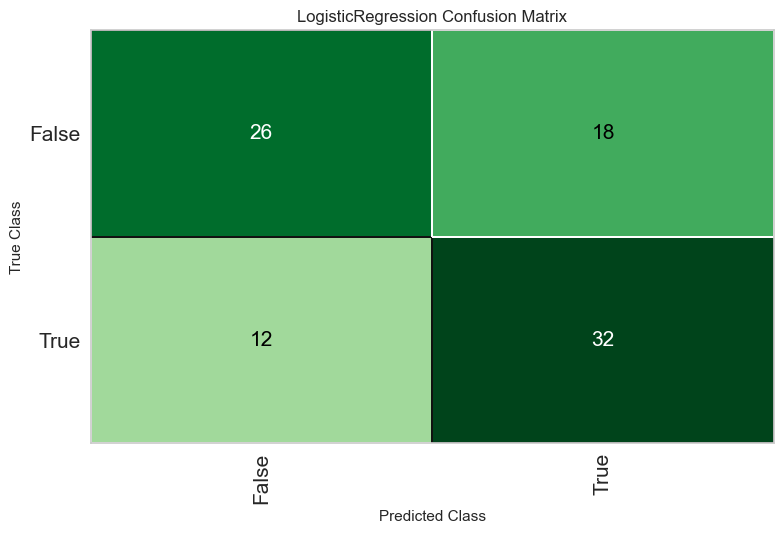

In [27]:
plot_model(tuned_lr, plot='confusion_matrix')

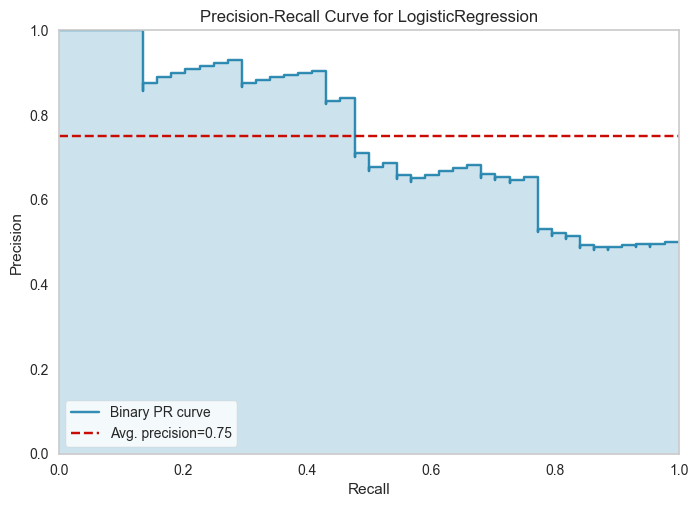

In [28]:
plot_model(tuned_lr, plot='pr')

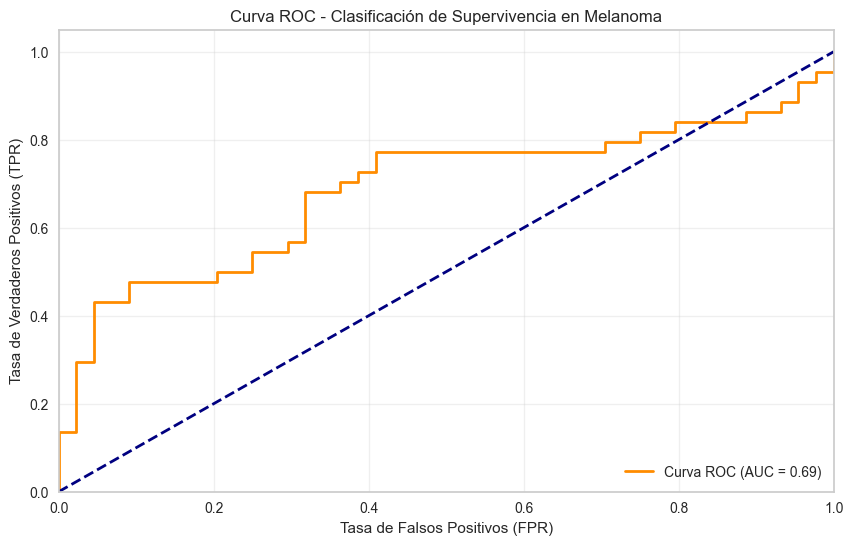

In [ ]:
y_test_clean = y_test.map({False: 0, True: 1}).dropna()
fpr, tpr, thresholds = roc_curve(y_test_clean, y_probas)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificación de Supervivencia en Melanoma')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

DISTRIBUCIÓN PROBABILIDADES

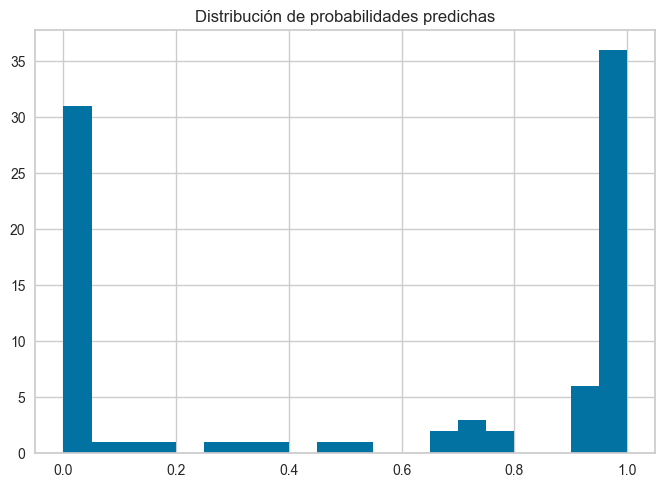

In [81]:
plt.hist(y_probas, bins=20)
plt.title("Distribución de probabilidades predichas")
plt.show()

DISTRIBUCIÓN BAYESIANA

In [ ]:
y_probas = tuned_lr.predict_proba(X_test_pca_comp)[:, 1]
df_bayesian = pd.DataFrame({
    'Score': y_probas,
    'Clase': y_test_clean.reset_index(drop=True).map({1: 'Agresivo', 0: 'No Agresivo'})
})

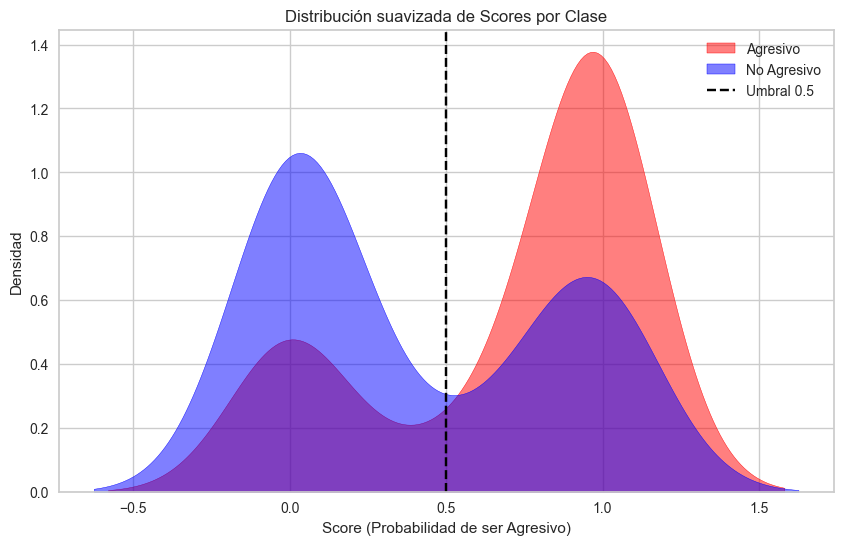

In [83]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_bayesian[df_bayesian['Clase'] == 'Agresivo']['Score'], label='Agresivo', fill=True, color='red', alpha=0.5)
sns.kdeplot(df_bayesian[df_bayesian['Clase'] == 'No Agresivo']['Score'], label='No Agresivo', fill=True, color='blue', alpha=0.5)
plt.axvline(0.5, color='black', linestyle='--', label='Umbral 0.5')
plt.title('Distribución suavizada de Scores por Clase')
plt.xlabel('Score (Probabilidad de ser Agresivo)')
plt.ylabel('Densidad')
plt.legend()
plt.show()


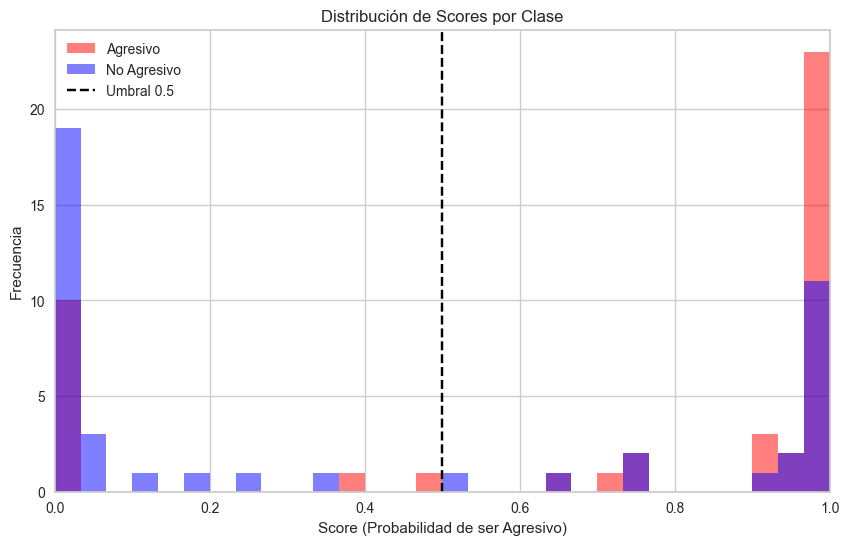

In [84]:
plt.figure(figsize=(10, 6))
plt.hist(df_bayesian[df_bayesian['Clase'] == 'Agresivo']['Score'], bins=30, alpha=0.5, label='Agresivo', color='red')
plt.hist(df_bayesian[df_bayesian['Clase'] == 'No Agresivo']['Score'], bins=30, alpha=0.5, label='No Agresivo', color='blue')
plt.axvline(0.5, color='black', linestyle='--', label='Umbral 0.5')
plt.title('Distribución de Scores por Clase')
plt.xlabel('Score (Probabilidad de ser Agresivo)')
plt.ylabel('Frecuencia')
plt.xlim(0, 1)
plt.legend()
plt.show()

CLASSIFICATION REPORT

In [85]:
from sklearn.metrics import classification_report
y_pred = tuned_lr.predict(X_test_pca_comp)
print(classification_report(y_test_clean, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63        44
           1       0.64      0.73      0.68        44

    accuracy                           0.66        88
   macro avg       0.66      0.66      0.66        88
weighted avg       0.66      0.66      0.66        88



OPTUNA PARA OPTIMIZAR PARAMETROS

In [86]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

def objective(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'])
    
    # Validar combinaciones válidas
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()  # O simplemente return un valor bajo
    if penalty == 'l2' and solver not in ['lbfgs', 'newton-cg', 'sag', 'saga']:
        raise optuna.exceptions.TrialPruned()
    
    params = {
        'C': trial.suggest_float('C', 1e-3, 1e2, log=True),
        'penalty': penalty,
        'solver': solver,
        'max_iter': 1000,
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }
    
    model = LogisticRegression(**params)
    score = cross_val_score(model, X_train_pca_comp, y_train, cv=5, scoring='f1').mean()
    return score



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

print("Mejores parámetros:", study.best_params)
print("Mejor f1-score:", study.best_value)

[I 2025-07-04 13:59:59,307] A new study created in memory with name: no-name-633d77ec-000b-43cd-9fb9-177062757253
[I 2025-07-04 13:59:59,307] Trial 0 pruned. 
[I 2025-07-04 13:59:59,683] Trial 1 finished with value: 0.5977446520408447 and parameters: {'penalty': 'l2', 'solver': 'newton-cg', 'C': 5.559777491777058, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.5977446520408447.
[I 2025-07-04 13:59:59,683] Trial 2 pruned. 
[I 2025-07-04 14:00:03,720] Trial 3 finished with value: 0.5823122827726409 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 9.775472404531882, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.5977446520408447.
[I 2025-07-04 14:00:03,735] Trial 4 pruned. 
[I 2025-07-04 14:00:03,735] Trial 5 pruned. 
[I 2025-07-04 14:00:04,100] Trial 6 finished with value: 0.6018350168350168 and parameters: {'penalty': 'l2', 'solver': 'newton-cg', 'C': 0.07857551239755757, 'class_weight': None}. Best is trial 6 with value: 0.6018350168350168.
[I 2025-07-04

Mejores parámetros: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.005304694604685178, 'class_weight': None}
Mejor f1-score: 0.6486080057508629


In [38]:
best_params = study.best_params
best_model_optuna = LogisticRegression(**best_params, max_iter=1000)
best_model_optuna.fit(X_train_pca_comp, y_train)

LogisticRegression(C=0.012749108892513152, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_optuna = best_model_optuna.predict(X_test_pca_comp)
y_pred_proba_optuna = best_model_optuna.predict_proba(X_test_pca_comp)[:, 1]
print(best_model_optuna.score(X_test_pca_comp, y_test)) #proporción de aciertos

0.6022727272727273


In [87]:
final_f1 = f1_score(y_test, y_pred_optuna)
final_f1

0.5882352941176471

VISUALIZACIÓN RESULTADOS OPTUNA

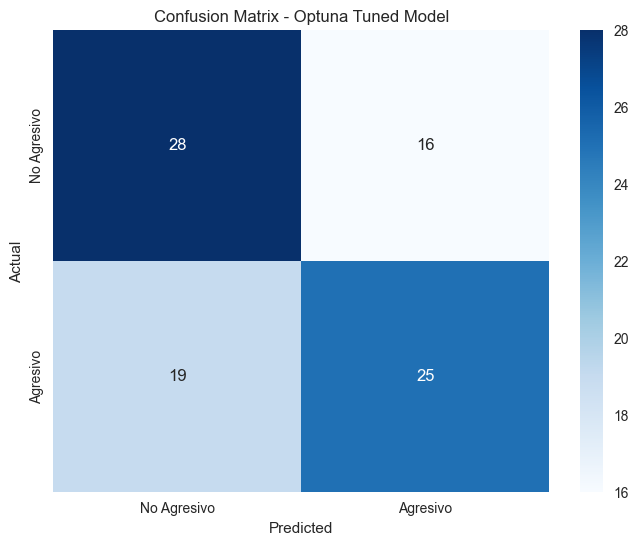

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_optuna)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Agresivo', 'Agresivo'], yticklabels=['No Agresivo', 'Agresivo'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optuna Tuned Model')
plt.show()

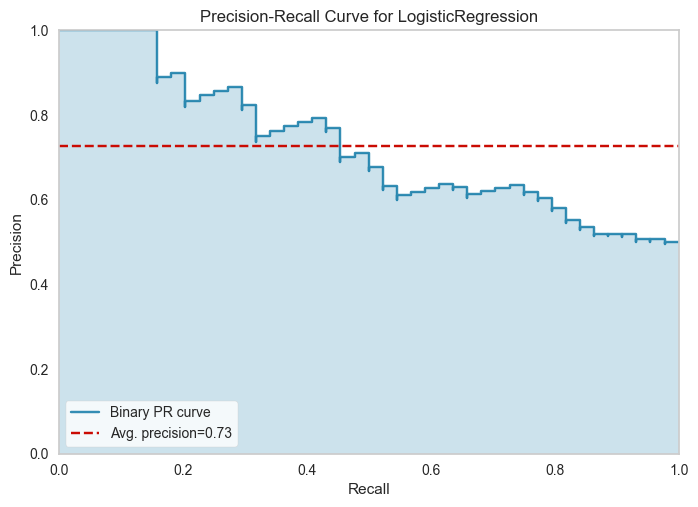

In [46]:
plot_model(best_model_optuna, plot='pr')

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_optuna))

              precision    recall  f1-score   support

       False       0.60      0.64      0.62        44
        True       0.61      0.57      0.59        44

    accuracy                           0.60        88
   macro avg       0.60      0.60      0.60        88
weighted avg       0.60      0.60      0.60        88



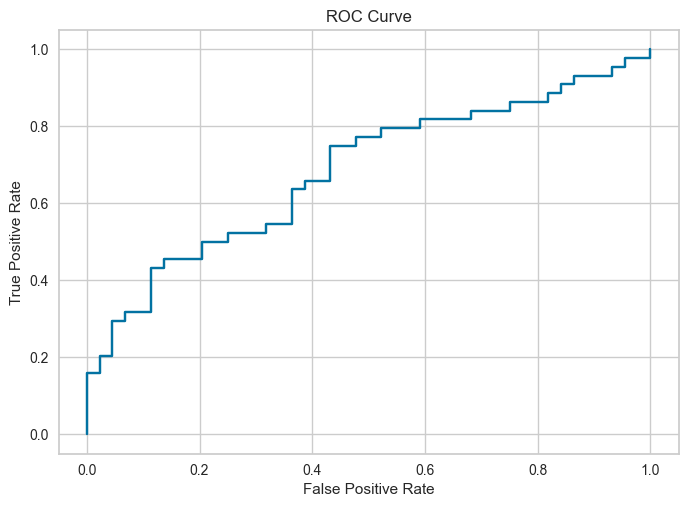

In [48]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_optuna)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

CAMBIO DE UMBRALES (sin optuna)

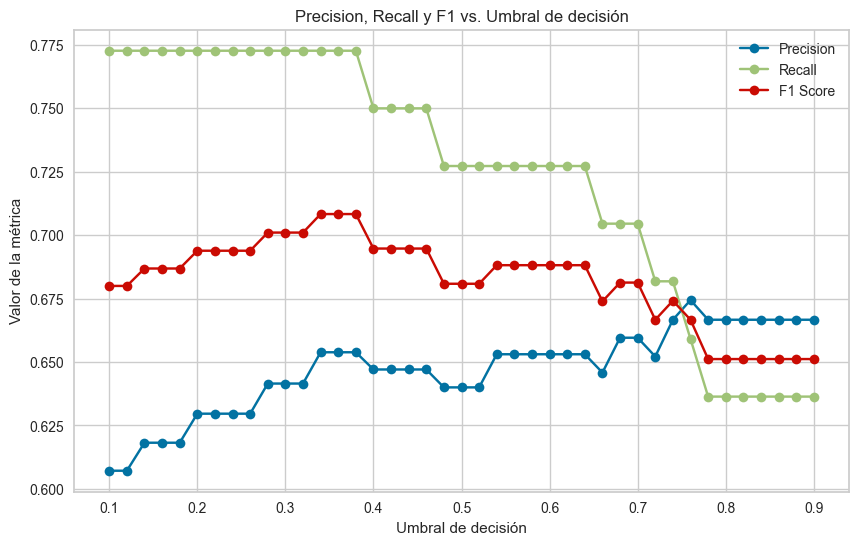

In [88]:
thresholds = np.arange(0.1, 0.91, 0.02) #distintos umbrales de decisión
precisions = []
recalls = []
f1s = []

for thresh in thresholds:
    y_pred = (y_probas >= thresh).astype(int) #comparo probabilidades con el umbral, mayor probabilidad es agrisivo, menor es no agresivo
    precisions.append(precision_score(y_test, y_pred)) #precisión de las positivas (nº de correctas)
    recalls.append(recall_score(y_test, y_pred)) #recall de las positivas (cuantos positivos he detectado)
    f1s.append(f1_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1s, label='F1 Score', marker='o')
plt.xlabel('Umbral de decisión')
plt.ylabel('Valor de la métrica')
plt.title('Precision, Recall y F1 vs. Umbral de decisión')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

       False       0.72      0.59      0.65        44
        True       0.65      0.77      0.71        44

    accuracy                           0.68        88
   macro avg       0.69      0.68      0.68        88
weighted avg       0.69      0.68      0.68        88



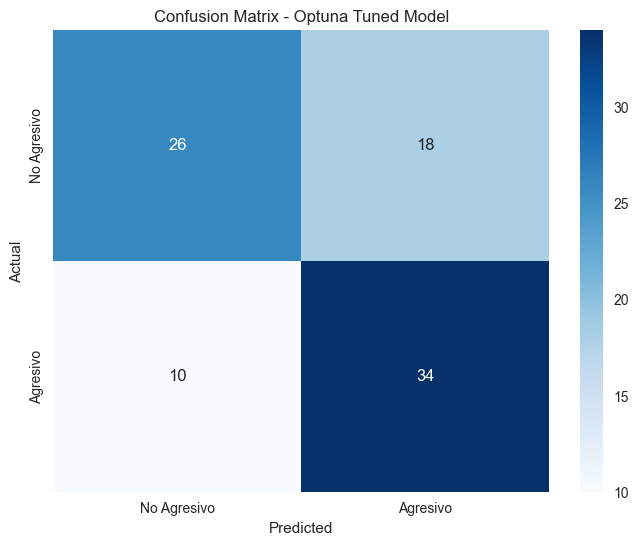

In [104]:
umbral = 0.38
y_pred_38 = (y_probas >= umbral).astype(int)
print(classification_report(y_test, y_pred_38))
cm = confusion_matrix(y_test, y_pred_38)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Agresivo', 'Agresivo'], yticklabels=['No Agresivo', 'Agresivo'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optuna Tuned Model')
plt.show()

FEATURE IMPORTANCE

In [90]:
coefs_lr = tuned_lr.coef_[0] 
pca_components = pca_final.components_ 
importancia_genes = np.dot(coefs_lr, pca_components)
importancia_absoluta = np.abs(importancia_genes)
importancia_df = pd.DataFrame({
    'Gene': X_train.columns,
    'Importancia': importancia_absoluta
}).sort_values(by='Importancia', ascending=False)


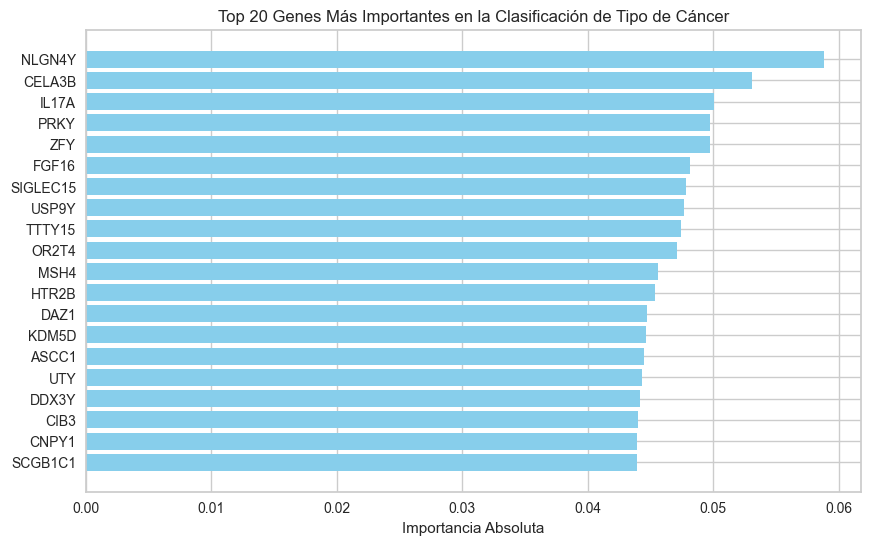

In [91]:
top_genes = importancia_df.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_genes['Gene'], top_genes['Importancia'], color='skyblue')
plt.xlabel('Importancia Absoluta')
plt.title('Top 20 Genes Más Importantes en la Clasificación de Tipo de Cáncer')
plt.gca().invert_yaxis()
plt.show()

RANDOM FOREST

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state=42)

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_pca_comp, y_train)

print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [95]:
rf_final = grid_search.best_estimator_
rf_final.fit(X_train_pca_comp, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [96]:
from sklearn.metrics import confusion_matrix
y_pred = rf_final.predict(X_test_pca_comp)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26 18]
 [15 29]]
              precision    recall  f1-score   support

       False       0.63      0.59      0.61        44
        True       0.62      0.66      0.64        44

    accuracy                           0.62        88
   macro avg       0.63      0.62      0.62        88
weighted avg       0.63      0.62      0.62        88

